In [10]:
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample, shuffle

import warnings
warnings.filterwarnings("ignore")

## Import File

In [11]:
data = pd.read_csv('winequality-red.csv')

## Preprocess Data

### Label Quality

0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

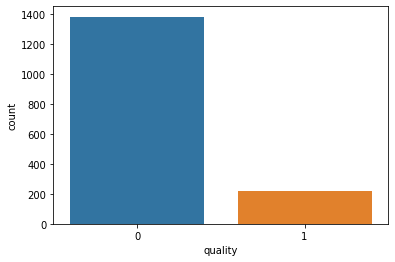

In [12]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins=bins, labels=group_names)

label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

print(data['quality'].value_counts())
sns.countplot(data['quality'])

### Oversample

0    1382
1    1382
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

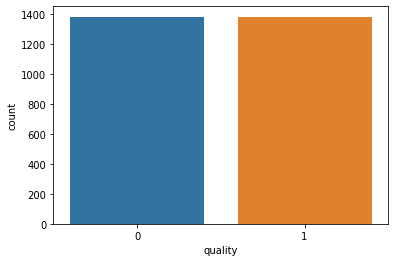

In [13]:
zeros = data[data['quality']==0]
ones = data[data['quality']==1]

ones_upsampled = resample(ones, replace=True, n_samples=zeros.shape[0])

data_new = pd.concat([zeros, ones_upsampled])
data_new = shuffle(data_new)

print(data_new['quality'].value_counts())
sns.countplot(data_new['quality'])

### Split and Scale Data

In [14]:
X = data_new.drop('quality', axis=1)
y = data_new['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [15]:
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.fit_transform(X_test)

## SVC Learning

In [16]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       284
           1       0.83      0.90      0.87       269

    accuracy                           0.86       553
   macro avg       0.87      0.87      0.86       553
weighted avg       0.87      0.86      0.86       553



## Grid Serch and Cross Validation

In [17]:
param = {
    'C' : [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [19]:
svc2 = SVC(C=1.4, gamma=1.4, kernel='rbf')
svc2.fit(X_train, y_train)
y_pred2 = svc2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       284
           1       0.97      0.99      0.98       269

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553

